In [1]:
import sys
import os
import json
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from IPython import display
from sklearn.model_selection import train_test_split

from chemicalchecker import ChemicalChecker 
from chemicalchecker.core import DataSignature
from chemicalchecker.util import Config

ChemicalChecker.set_verbosity('DEBUG')
%matplotlib inline

2022-07-28 09:43:29,950 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] Logging level DEBUG for logger 'chemicalchecker'.


In [2]:
data_path = "/aloy/web_checker/package_cc/2021_07/sign_links"
local_cc_dir = "/aloy/home/mlocatelli/code/local_cc_complete/"
# Our local cc instance
cc_local = ChemicalChecker(local_cc_dir, custom_data_path=data_path)

2022-07-28 09:43:31,125 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-28 09:43:31,207 chemicalchecker.core.chemcheck.ChemicalChecker [INFO    ] CC root directory exists: ignoring 'custom_data_path'.


In [3]:
# read in chembl antibiotics for benchmark
chembl_antibiotics_df = pd.read_csv('../data/chembl_antobiotics_inchikeys_df.csv')

In [4]:
dataset = 'M2.001'

In [5]:
# Load the raw data (z-scores)
# Rows: inchikeys
# Columns: normalized E. coli metabolite intensity

inputFile = "../data/campos_extended_matrix_inchikeys.csv"

df = pd.read_csv(inputFile, index_col = 0)

In [6]:
df

,metabolite_1,metabolite_2,metabolite_3,metabolite_4,metabolite_5,metabolite_6,metabolite_7,metabolite_8,metabolite_9,metabolite_10,...,metabolite_960,metabolite_961,metabolite_962,metabolite_963,metabolite_964,metabolite_965,metabolite_966,metabolite_967,metabolite_968,metabolite_969
AADCDMQTJNYOSS-LBPRGKRZSA-N,0.125893,-0.254860,-0.879626,1.140150,0.041542,0.820941,-0.054836,-1.579578,-0.498644,0.759653,...,-0.946303,0.527036,-0.826519,0.312930,-0.344269,-0.606251,-0.066832,-0.044559,-0.858687,-0.911569
AAFNEINEQRQMTF-LREBCSMRSA-N,-1.194746,0.143042,0.067488,-0.299175,-1.052552,-1.207495,2.176115,-0.563386,0.036507,0.781593,...,-0.758251,0.737181,-1.668036,-1.869166,-0.118406,-0.659779,0.133741,-2.006336,-0.110296,0.245076
ABTXGJFUQRCPNH-UHFFFAOYSA-N,0.188807,0.133726,0.343841,0.675060,0.233839,-0.242988,-0.157781,1.084959,0.154835,-0.130628,...,-0.063158,-0.159939,-0.096345,0.369073,-0.254000,0.277707,-0.485726,-0.044583,0.023789,0.061695
ACGDKVXYNVEAGU-UHFFFAOYSA-N,0.956394,-0.723133,0.202180,0.620544,2.107298,0.331794,1.822242,0.687388,0.181422,0.783386,...,0.387567,-0.156143,-0.818329,-0.639664,-1.096123,0.374778,0.062416,-0.079797,0.449327,-0.220253
ACGUYXCXAPNIKK-UHFFFAOYSA-N,-0.181969,-0.539771,-2.142445,-1.544044,-0.126133,-0.437213,0.351800,-1.498574,-0.198774,0.274755,...,0.634635,-1.080523,-0.393437,-0.337262,0.845454,-0.282612,-0.190942,-1.117762,-1.042433,0.443701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXKXJHAOUFHNAS-FVGYRXGTSA-N,0.245625,-0.189853,0.046320,0.320218,-0.021597,0.592178,0.999009,0.156916,-0.416755,-0.415147,...,0.211907,0.295118,0.454375,0.471495,0.099019,-0.064562,-0.220591,1.728176,0.856480,-1.969440
ZXNRTKGTQJPIJK-UHFFFAOYSA-N,0.452195,0.107178,0.079858,0.484860,0.032294,-0.026142,0.905255,-1.277152,-0.156753,-0.835550,...,-0.056455,0.174774,-0.988316,0.027194,0.097843,0.025724,0.499597,0.363585,0.636862,-0.157763
ZYSCHNVPUOSLNC-BTJKTKAUSA-N,-0.050759,-0.127447,1.556915,1.616359,1.600235,0.391248,1.622969,1.571186,0.040840,-0.547748,...,1.035546,-0.311631,-0.398663,-1.758119,1.378177,0.192307,-0.145598,-0.074433,0.106007,1.078514
ZZORFUFYDOWNEF-UHFFFAOYSA-N,0.200499,0.137398,0.138441,-0.598252,-0.309113,-0.392458,-0.244352,-0.076327,-0.391745,-0.280281,...,-0.493240,-0.333704,1.917683,-0.912334,0.278607,0.079143,-0.778008,-1.254127,-0.009660,-0.184820


/opt/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


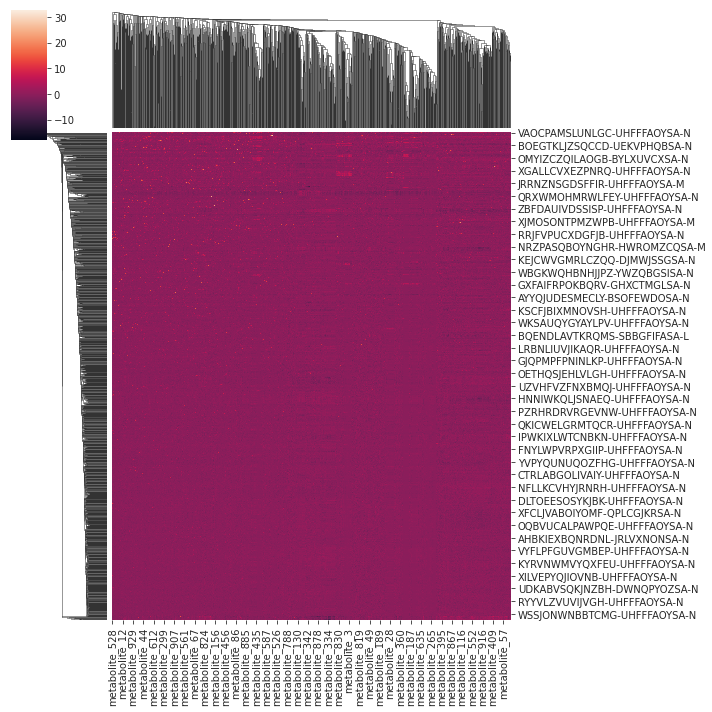

In [7]:
g = sns.clustermap(df)

### Signature 0

In [7]:
sign0 = cc_local.signature(dataset,'sign0')
sign0.clear_all()
sign0.fit(X=df.values, keys=list(df.index), features=list(df.columns), do_triplets=False, overwrite=True, sanitize=True, validations=False)

2022-07-25 09:58:33.616453: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-25 09:58:35,640 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign0
2022-07-25 09:58:35,696 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/sign0
2022-07-25 09:58:35,712 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/sign0
2022-07-25 09:58:35,765 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign0
2022-07-25 09:58:35,766 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/full/M/

In [8]:
sign0 = cc_local.signature(dataset,'sign0')
sign0.shape

2022-07-25 10:04:44,096 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign0


(1309, 969)

2022-07-25 10:04:45,583 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign0
2022-07-25 10:04:45,585 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-25 10:04:45,691 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-25 10:04:45,693 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-25 10:04:45,717 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Full dataset sampled (n=1309)
2022-07-25 10:04:45,717 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2022-07-25 10:04:45,903 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign0/diags/local_cc_complete_sign0/subsampled_data.pkl
2022-07-25 10:04:46,028 chemicalcheck

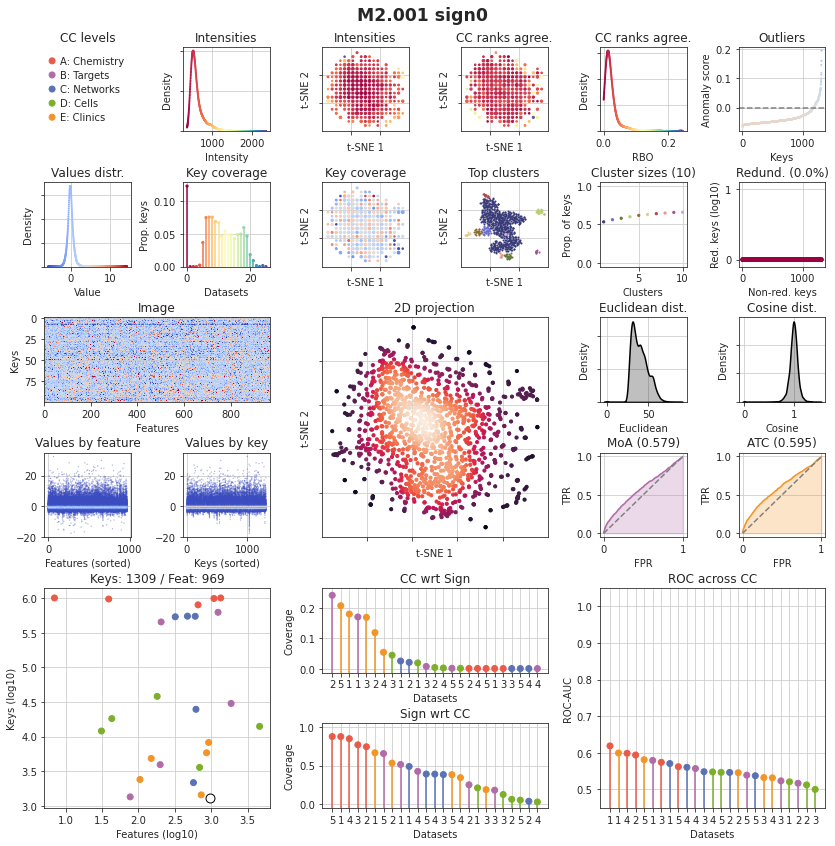

In [9]:
# Sign0 diagnostic plots
sign0 = cc_local.signature(dataset, 'sign0')
diag0 = sign0.diagnosis(ref_cctype='sign0')
diag0.canvas_medium()

### Signature 1

In [10]:
sign0 = cc_local.signature(dataset, 'sign0')
sign1 = cc_local.signature(dataset, 'sign1')
sign1.clear_all()

sign1.fit(sign0, overwrite=True, validations=False, metric_learning=False)

2022-07-25 10:12:40,276 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign0
2022-07-25 10:12:40,279 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign1
2022-07-25 10:12:40,284 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/sign1
2022-07-25 10:12:40,315 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/sign1
2022-07-25 10:12:40,385 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign1
2022-07-25 10:12:40,386 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code

In [11]:
sign1 = cc_local.signature(dataset, 'sign1')
sign1.shape

2022-07-25 10:12:53,689 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign1


(1309, 384)

In [12]:
sign1_ref = cc_local.get_signature('sign1', 'reference', dataset)
sign1_ref.shape

2022-07-25 10:12:58,879 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/sign1


(1309, 384)

2022-07-25 10:13:02,744 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign1
2022-07-25 10:13:02,746 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-25 10:13:02,850 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-25 10:13:02,852 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-25 10:13:02,868 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Full dataset sampled (n=1309)
2022-07-25 10:13:02,869 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2022-07-25 10:13:02,911 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign1/diags/local_cc_complete_sign0/subsampled_data.pkl
2022-07-25 10:13:02,964 chemicalcheck

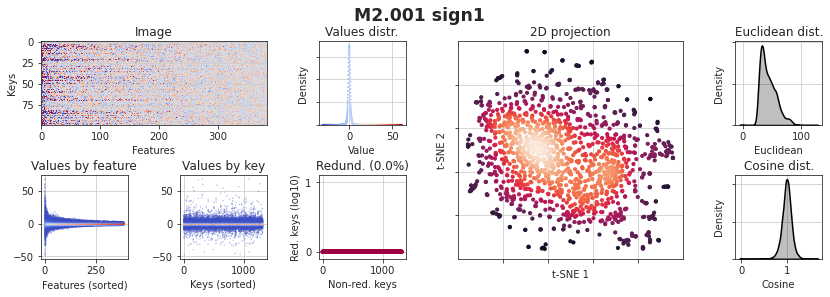

In [13]:
# Sign1 diagnostic plots
sign1 = cc_local.signature(dataset, 'sign1')
diag1 = sign1.diagnosis(ref_cctype='sign0')
diag1.canvas_small()

#### Signature 1 neighbors

In [14]:
sign1 = cc_local.signature(dataset, 'sign1')
neig1 = cc_local.signature(dataset, 'neig1')
neig1.clear_all()
neig1.fit(sign1)

2022-07-25 10:13:20,700 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign1
2022-07-25 10:13:20,702 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/neig1
2022-07-25 10:13:20,704 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/neig1
2022-07-25 10:13:20,704 chemicalchecker.core.neig.neig [DEBUG   ] data_path: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/neig1/neig.h5
2022-07-25 10:13:20,705 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/neig1
2022-07-25 10:13:20,729 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/neig1
2022-07-25 10:1

### Signature 2

In [15]:
sign2 = cc_local.signature(dataset,'sign2')
sign2.clear_all()
# TODO: check here if fit has to run on reference
sign2_ref = cc_local.get_signature('sign2','reference',dataset)
sign1 = cc_local.signature(dataset, 'sign1')
neig1 = cc_local.signature(dataset, 'neig1')
sign2_ref.fit(sign1,neig1, oos_predictor=False, overwrite=True, validations=False)

2022-07-25 10:13:24,087 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign2
2022-07-25 10:13:24,090 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/sign2
2022-07-25 10:13:24,107 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/sign2
2022-07-25 10:13:24,166 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign2
2022-07-25 10:13:24,167 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign2
2022-07-25 10:13:24,258 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code

In [16]:
sign2 = cc_local.signature(dataset,'sign2')
sign2.shape

2022-07-25 10:13:59,983 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign2


(1309, 128)

2022-07-25 10:14:03,851 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign2
2022-07-25 10:14:03,853 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-25 10:14:03,952 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-25 10:14:03,954 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-25 10:14:03,964 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Full dataset sampled (n=1309)
2022-07-25 10:14:03,964 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2022-07-25 10:14:03,976 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign2/diags/local_cc_complete_sign0/subsampled_data.pkl
2022-07-25 10:14:03,993 chemicalcheck

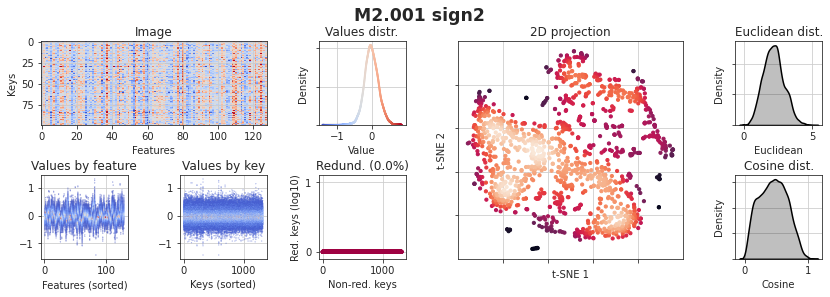

In [17]:
sign2 = cc_local.signature(dataset, 'sign2')
diag2 = sign2.diagnosis(ref_cctype='sign0')
diag2.canvas_small()

2022-07-25 10:14:17,015 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-25 10:14:17,017 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign0
2022-07-25 10:14:19,046 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign0
2022-07-25 10:14:19,078 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 1309 rows from dataset V
2022-07-25 10:14:19,616 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 1309 rows from dataset V


<AxesSubplot:title={'center':'AUROC (0.867)'}, xlabel='FPR', ylabel='TPR'>

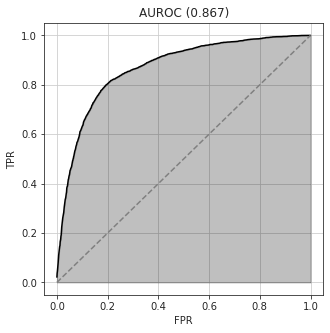

In [18]:
diag2.roc(dataset, 'sign0', plot=True, save=False)

### Signature 3

In [19]:
sign3 = cc_local.signature(dataset, 'sign3')
sign3.clear_all()

2022-07-25 10:14:45,765 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3
2022-07-25 10:14:45,842 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/sign3
2022-07-25 10:14:45,894 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/sign3
2022-07-25 10:14:45,944 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3
2022-07-25 10:14:45,946 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3


In [20]:
sign2_list = list()
for ds in cc_local.coordinates:
    ds += '.001'
    sign2_list.append(cc_local.get_signature('sign2', 'full', ds))
# adding new space to CC
sign2_list.append(cc_local.get_signature('sign2','full',dataset))

2022-07-25 10:14:49,576 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A1/A1.001/sign2
2022-07-25 10:14:49,597 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A2/A2.001/sign2
2022-07-25 10:14:49,616 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A3/A3.001/sign2
2022-07-25 10:14:49,629 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A4/A4.001/sign2
2022-07-25 10:14:49,647 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A5/A5.001/sign2
2022-07-25 10:14:49,649 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_

In [21]:
sign2_self = cc_local.signature(dataset, 'sign2')
sign1_self = cc_local.signature(dataset, 'sign1')

2022-07-25 10:15:04,509 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign2
2022-07-25 10:15:04,510 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign1


In [22]:
sign3.fit_hpc(sign2_list, sign2_self, sign1_self, None, 'full', None, cpu=8, mem_by_core=4, plots_train=False)

2022-07-25 10:15:05,785 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/nkurzawa/cc_config.json
2022-07-25 10:15:05,786 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/nkurzawa/cc_config.json
2022-07-25 10:15:05,795 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2022-07-25 10:15:05,796 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge
2022-07-25 10:15:07,301 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: sign3_fit_hpc.py
2022-07-25 10:15:07,302 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/nkurzawa/tmp_jobs/tmp_h2qfg1b_/job-sign3_fit_hpc.py.sh...
2022-07-25 10:15:07,306 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q /aloy/scratch/nkurzawa/tmp_jobs/tmp_h2qfg1b_/job-sign3_fit_hpc.py.sh
2022-07-25 10:15:09,834 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job id: 767045


2022-07-26 09:48:49.307719: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-26 09:48:55,115 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3
2022-07-26 09:48:55,118 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-26 09:48:55,253 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-26 09:48:55,255 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign0
2022-07-26 09:49:00,148 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign0
2022-07-26 09:49:04,073 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 1309 row

<AxesSubplot:title={'center':'AUROC (0.696)'}, xlabel='FPR', ylabel='TPR'>

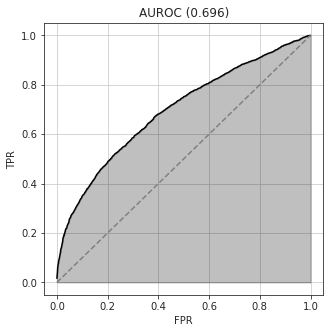

In [6]:
sign3 = cc_local.signature(dataset, 'sign3')
diag3 = sign3.diagnosis()
diag3.roc(dataset, 'sign0', save=False, plot=True)

#### Using manual triplets

In [7]:
s2 = cc_local.signature(dataset,'sign2')

2022-07-26 09:50:15,112 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign2


In [8]:
ink_pos = dict(zip(s2.keys, np.arange(len(s2.keys))))

In [9]:
s2_train_mat = DataSignature('/aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3/models/train.h5')

In [10]:
s2_train_mat.info_h5

{'keys': (1309,), 'x': (1309, 3328)}

In [11]:
triplet_ink_matrix = s2_train_mat.get_h5_dataset('x')

2022-07-26 09:51:10,736 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset x


In [12]:
triplet_ink_matrix

array([[-0.15185289,  0.06739662, -0.43352956, ...,  0.00752955,
        -0.1434    ,  0.278457  ],
       [-0.36720774,  0.17660898, -0.21269597, ..., -0.297524  ,
        -0.106986  ,  0.238153  ],
       [-0.00469187,  0.27604282, -0.6291754 , ...,  0.0532812 ,
        -0.0173029 ,  0.185311  ],
       ...,
       [-0.39090768,  0.10366904,  0.22041193, ...,  0.0393736 ,
        -0.105032  , -0.238818  ],
       [-0.46522662,  0.54266787, -0.4778983 , ...,  0.0283212 ,
         0.0952654 ,  0.0287113 ],
       [-0.2020602 ,  0.13708726, -0.05131074, ...,  0.230304  ,
        -0.0693624 ,  0.195228  ]], dtype=float32)

In [13]:
triplet_ink_keys = s2_train_mat.get_h5_dataset('keys')

2022-07-26 09:52:06,879 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset keys


In [15]:
manual_triplets = pd.read_csv('./m2_full_pca_triplets.tsv.gz', sep='\t')

In [16]:
manual_triplets['anchor'].values

array(['AADCDMQTJNYOSS-LBPRGKRZSA-N', 'AADCDMQTJNYOSS-LBPRGKRZSA-N',
       'AADCDMQTJNYOSS-LBPRGKRZSA-N', ..., 'ZZUFCTLCJUWOSV-UHFFFAOYSA-N',
       'ZZUFCTLCJUWOSV-UHFFFAOYSA-N', 'ZZUFCTLCJUWOSV-UHFFFAOYSA-N'],
      dtype=object)

In [17]:
triplet_array = np.vectorize(ink_pos.get)(manual_triplets.values)

In [18]:
triplet_array

array([[   0,    8,  272],
       [   0,    8,  680],
       [   0,    8,  766],
       ...,
       [1308, 1295, 1167],
       [1308, 1295, 1260],
       [1308, 1295, 1304]])

In [19]:
sign3 = cc_local.signature(dataset, 'sign3')
sign3.clear_all()

2022-07-26 09:53:16,876 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3
2022-07-26 09:53:16,882 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/sign3
2022-07-26 09:53:16,886 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/sign3
2022-07-26 09:53:16,937 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3
2022-07-26 09:53:16,938 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3


In [20]:
from chemicalchecker.util.splitter import NeighborTripletTraintest

In [21]:
NeighborTripletTraintest.precomputed_triplets(X=triplet_ink_matrix, ink_keys=triplet_ink_keys, triplets=triplet_array, 
                    out_file='/aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3/models/traintest_eval.h5')

[INFO    ] Loading faiss with AVX2 support.
[INFO    ] Successfully loaded faiss with AVX2 support.
2022-07-26 09:53:50,719 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] Traintest saving to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3/models/traintest_eval.h5
2022-07-26 09:53:52,601 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] NeighborTripletTraintest saved to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3/models/traintest_eval.h5


In [22]:
NeighborTripletTraintest.precomputed_triplets(X=triplet_ink_matrix, ink_keys=triplet_ink_keys, triplets=triplet_array, split_names=['train'], split_fractions=[1.0], suffix='final',
                    out_file='/aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3/models/traintest_final.h5')

2022-07-26 09:54:11,062 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] Traintest saving to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3/models/traintest_final.h5
2022-07-26 09:54:11,882 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] NeighborTripletTraintest saved to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3/models/traintest_final.h5


In [23]:
sign2_list = list()
for ds in cc_local.coordinates:
    ds += '.001'
    sign2_list.append(cc_local.get_signature('sign2', 'full', ds))
# adding new space to CC
sign2_list.append(cc_local.get_signature('sign2','full',dataset))

2022-07-26 09:54:22,860 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A1/A1.001/sign2
2022-07-26 09:54:22,864 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A2/A2.001/sign2
2022-07-26 09:54:22,867 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A3/A3.001/sign2
2022-07-26 09:54:22,870 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A4/A4.001/sign2
2022-07-26 09:54:22,873 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A5/A5.001/sign2
2022-07-26 09:54:22,884 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_

In [24]:
sign2_self = cc_local.signature(dataset, 'sign2')
sign1_self = cc_local.signature(dataset, 'sign1')

2022-07-26 09:54:31,999 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign2
2022-07-26 09:54:32,001 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign1


In [25]:
sign3.fit_hpc(sign2_list, sign2_self, sign1_self, None, 'full', None, cpu=8, mem_by_core=4, plots_train=False)

2022-07-26 09:54:45,448 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/nkurzawa/cc_config.json
2022-07-26 09:54:45,449 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/nkurzawa/cc_config.json
2022-07-26 09:54:45,514 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2022-07-26 09:54:45,515 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge
2022-07-26 09:54:46,277 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: sign3_fit_hpc.py
2022-07-26 09:54:46,278 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/nkurzawa/tmp_jobs/tmp_wtjj_xq1/job-sign3_fit_hpc.py.sh...
2022-07-26 09:54:46,281 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q /aloy/scratch/nkurzawa/tmp_jobs/tmp_wtjj_xq1/job-sign3_fit_hpc.py.sh
2022-07-26 09:54:48,659 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job id: 767092


2022-07-27 15:18:35.562086: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-27 15:18:37,560 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign3
2022-07-27 15:18:37,635 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-27 15:18:38,425 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-27 15:18:38,428 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign0
2022-07-27 15:18:40,375 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign0
2022-07-27 15:18:49,889 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 1309 row

<AxesSubplot:title={'center':'AUROC (0.856)'}, xlabel='FPR', ylabel='TPR'>

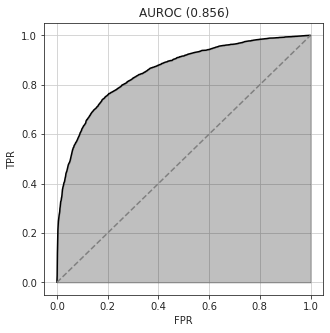

In [8]:
sign3 = cc_local.signature(dataset, 'sign3')
diag3 = sign3.diagnosis()
diag3.roc(dataset, 'sign0', save=False, plot=True)

In [ ]:
diag3.canvas_medium()

2022-07-27 15:25:38,799 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-27 15:25:39,037 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Euclidean distances
2022-07-27 15:25:39,101 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Projection
2022-07-27 15:25:39,117 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fit-transforming t-SNE
2022-07-27 15:25:39,119 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] First doing a PCA
2022-07-27 15:25:39,222 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Chosen perplexity 50
2022-07-27 15:26:11,607 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Image
2022-07-27 15:26:11,664 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Features bins
2022-07-27 15:26:11,799 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Keys bins
2022-07-27 15:26:13,295 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Values
2022-07-27 15:26:13,580 chemicalchecker.core.diagnostics.Diagnosis [DEBUG

In [11]:
import random
random.seed(30)

X_orig, keys_orig = diag3._get_signatures(keys=df.index.values, max_keys=100000)
X_ab, keys_ab = diag3._get_signatures(keys=chembl_antibiotics_df['InChiKey'].values, max_keys=100000)
X_others, keys_others = diag3._get_signatures(keys=None, max_keys=100000)

from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

X, keys = diag3._get_signatures(keys=np.concatenate((keys_orig, keys_ab, keys_others), axis=None), max_keys=100000)
X = PCA(n_components=100).fit_transform(X)
init = PCA(n_components=2).fit_transform(X)
perp = int(np.sqrt(X.shape[0]))
perp = np.max([5, perp])
perp = np.min([50, perp])
print(perp)
tsne = TSNE(perplexity=perp, init=init, n_jobs=diag3.cpu)
P_ = tsne.fit_transform(X)
P = P_[:len(keys)]

maier_anno_df = pd.read_csv('../data/maier_anno_inchikey_df.csv')
maier_anno_df = maier_anno_df.set_index(maier_anno_df['InChiKey'].values)
p_data = pd.DataFrame(P, index=keys, columns=['V1', 'V2'])
p_data = p_data.join(maier_anno_df)

2022-07-27 15:21:54,424 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 1309 keys found
2022-07-27 15:21:54,426 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-27 15:21:54,426 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 1309 rows from dataset V
2022-07-27 15:22:14,427 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 249 keys found
2022-07-27 15:22:14,428 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-27 15:22:14,428 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 249 rows from dataset V
2022-07-27 15:22:20,450 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-27 15:22:20,452 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Subsampling dataset (n=10000)
2022-07-27 15:22:55,381 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.00

50


ValueError: Could not interpret value `antibiotic_class` for parameter `hue`

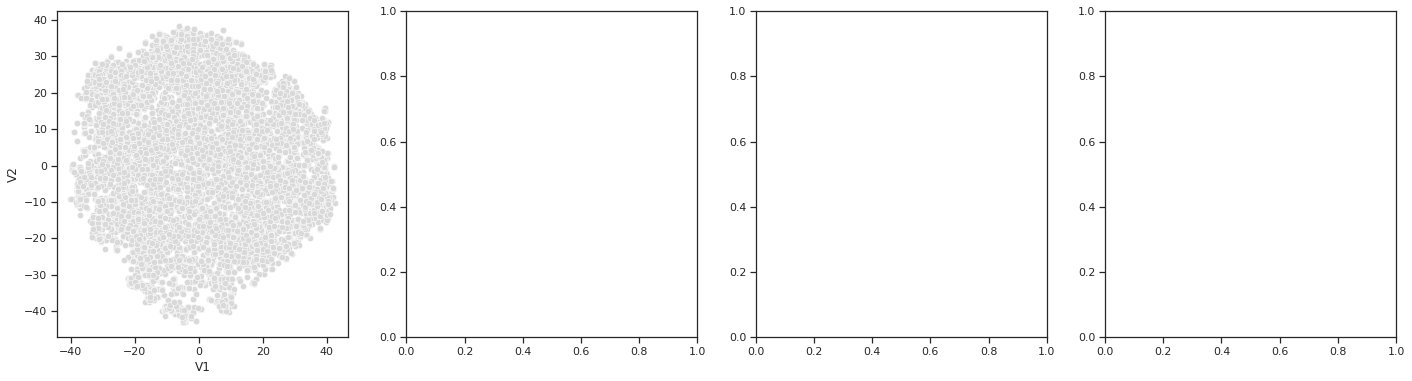

In [12]:
top_fungicidals_anno_df = pd.read_csv('../data/top30_fungicidal_inchikeys_spitzer.csv')
a_muciniphilia_anno_df = pd.read_csv('../data/amuciniphilia_inchikeys_df.csv')

sns.set(rc={"figure.figsize":(24, 6)})
sns.set_theme(style="ticks")

fig, ax =plt.subplots(1,4)
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='antibiotic_class',ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(chembl_antibiotics_df['InChiKey'])], s=40, color="0", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(top_fungicidals_anno_df['InChiKey'])], s=40, color="0", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[3])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='drug_class',ax=ax[3])
fig.show()

### Signature 4

In [9]:
sign4 = cc_local.signature(dataset, 'sign4')
sign4.clear_all()

2022-07-27 15:21:37,242 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign4
2022-07-27 15:21:37,286 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/sign4
2022-07-27 15:21:37,302 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M2/M2.001/sign4
2022-07-27 15:21:37,470 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign4
2022-07-27 15:21:37,472 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign4


In [10]:
sign4.fit_hpc(None,None,None,True,False,cpu=8, mem_by_core=8)

2022-07-27 15:21:41,529 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/nkurzawa/cc_config.json
2022-07-27 15:21:41,532 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/nkurzawa/cc_config.json
2022-07-27 15:21:41,681 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2022-07-27 15:21:41,682 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge
2022-07-27 15:21:42,479 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: sign4_fit_hpc.py
2022-07-27 15:21:42,481 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/nkurzawa/tmp_jobs/tmp_gv2bu45l/job-sign4_fit_hpc.py.sh...
2022-07-27 15:21:42,510 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q /aloy/scratch/nkurzawa/tmp_jobs/tmp_gv2bu45l/job-sign4_fit_hpc.py.sh
2022-07-27 15:21:44,952 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job id: 767134


2022-07-28 09:44:01.929902: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-28 09:44:07,633 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign4
2022-07-28 09:44:07,635 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-28 09:44:07,775 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-28 09:44:07,778 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign0
2022-07-28 09:44:13,254 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign0
2022-07-28 09:44:16,775 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 1148 row

<AxesSubplot:title={'center':'AUROC (0.797)'}, xlabel='FPR', ylabel='TPR'>

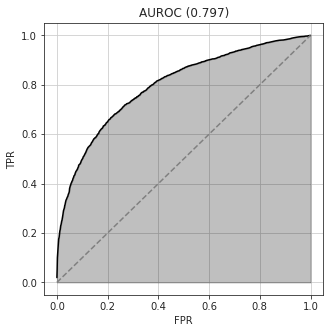

In [7]:
sign4 = cc_local.signature(dataset, 'sign4')
diag4 = sign4.diagnosis()
diag4.roc(dataset, 'sign0', save=False, plot=True)

2022-07-28 09:44:43,594 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-28 09:44:43,597 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-28 09:44:43,597 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Subsampling dataset (n=10000)
2022-07-28 09:44:55,676 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign4/diags/local_cc_complete_sign0/subsampled_data.pkl
2022-07-28 09:44:55,742 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Euclidean distances
2022-07-28 09:44:55,750 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Projection
2022-07-28 09:44:55,754 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fit-transforming t-SNE
2022-07-28 09:44:55,754 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] First doing a PCA
2022-07-28 09:44:56,318 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Chose

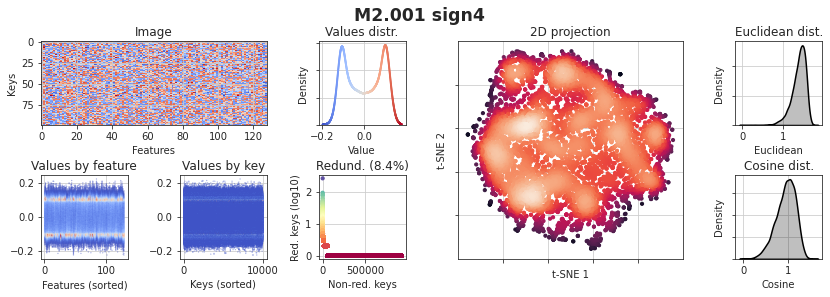

In [8]:
diag4.canvas_small()

In [9]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

X_orig, keys_orig = diag4._get_signatures(keys=df.index.values, max_keys=100000)

X_ab, keys_ab = diag4._get_signatures(keys=chembl_antibiotics_df['InChiKey'].values, max_keys=100000)
X_others, keys_others = diag4._get_signatures(keys=None, max_keys=100000)

X, keys = diag4._get_signatures(keys=np.concatenate((keys_orig, keys_ab, keys_others, 'FNOKZRYCHPSURW-WFXFPESJSA-N'), axis=None), 
                                max_keys=100000)
X_pca = PCA(n_components=100).fit_transform(X)
init = PCA(n_components=2).fit_transform(X_pca)
perp = int(np.sqrt(X.shape[0]))
perp = np.max([5, perp])
perp = np.min([50, perp])
print(perp)
tsne = TSNE(perplexity=perp, init=init, n_jobs=diag4.cpu)
P_ = tsne.fit_transform(X_pca)
P = P_[:len(keys)]

2022-07-28 09:46:54,466 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 1148 keys found
2022-07-28 09:46:54,469 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-28 09:46:54,470 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 1148 rows from dataset V
2022-07-28 09:46:56,676 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 236 keys found
2022-07-28 09:46:56,677 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-28 09:46:56,677 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 236 rows from dataset V
2022-07-28 09:46:58,842 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 11340 keys found
2022-07-28 09:46:58,854 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-28 09:46:58,855 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 11340 rows from dataset V


50


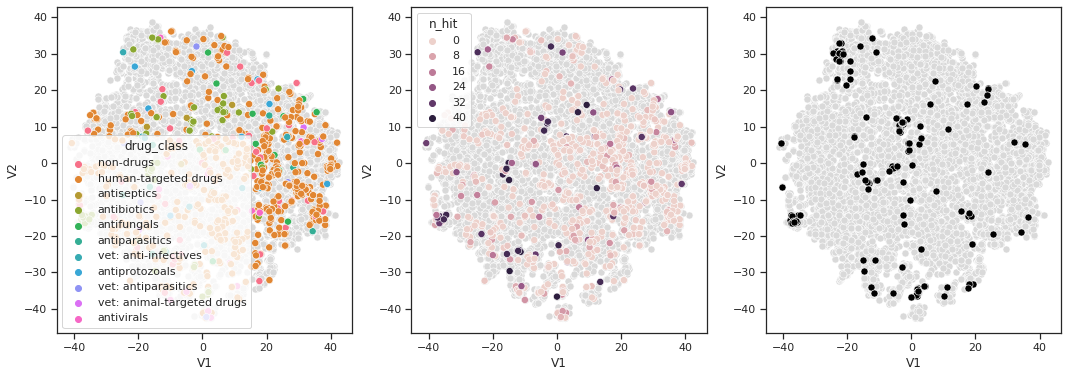

In [10]:
maier_anno_df = pd.read_csv('../data/maier_anno_inchikey_df.csv')
maier_anno_df = maier_anno_df.set_index(maier_anno_df['InChiKey'].values)
p_data = pd.DataFrame(P, index=keys, columns=['V1', 'V2'])
p_data = p_data.join(maier_anno_df)
sns.set(rc={"figure.figsize":(18, 6)})
sns.set_theme(style="ticks")

fig, ax =plt.subplots(1,3)
sns.scatterplot(x='V1', y='V2', data=p_data, s=50, color=".85", ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=50, hue='drug_class',ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data, s=50, color=".85", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=50, hue='n_hit',ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data, s=50, color=".85", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(chembl_antibiotics_df['InChiKey'].values)], s=50, color="0", ax=ax[2])
#sns.scatterplot(x='V1', y='V2', data=p_data, s=50, color=".85", ax=ax[3])
#sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(['FNOKZRYCHPSURW-WFXFPESJSA-N'])], s=50, color="0", ax=ax[3])
fig.show()

In [11]:
# get sign4 values for all compounds of the original dataset
compound_mapping_df = pd.read_csv('../data/anglada_girotto_cpd_name_smiles_inchikey_corrected_df.csv')
df_smiles = compound_mapping_df[compound_mapping_df.InChiKey.isin(df.index)]['SMILES_cc'].to_list()

dest_file = '../data/M2_001_sign4_data.h5'

sign4.predict_from_smiles(df_smiles, dest_file=dest_file)

NameError: name 'X_train' is not defined

In [15]:
# save as csv file
df_h5 = DataSignature(dest_file)
sign4_df = pd.DataFrame(df_h5.get_h5_dataset('V'))
sign4_df['SMILES_cc'] = df_smiles
sign4_df = sign4_df.merge(compound_mapping_df, how='left', on='SMILES_cc')
sign4_df.to_csv('../data/M2_001_sign4_data.csv')

2022-07-28 09:57:26,675 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V


In [16]:
sign4_df

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,SMILES_cc,...1,compound_name_abbr,full_name,InChiKey
0,-0.086441,-0.006661,-0.079948,0.124568,-0.027816,-0.123110,-0.117900,-0.118840,0.111688,0.072191,...,-0.049106,0.116667,0.103280,0.003834,-0.101255,CN(N=O)C(=O)N[C@H]1[C@@H](O)O[C@H](CO)[C@@H](O...,0,Streptozotocin,Streptozotocin,ZSJLQEPLLKMAKR-GKHCUFPYSA-N
1,-0.085701,-0.087312,-0.070520,-0.054773,-0.125192,-0.117276,-0.069973,0.040956,0.111470,-0.092604,...,0.018912,0.110714,0.052236,-0.109938,-0.026601,CC(=O)N(O)CCCCCNC(=O)CCC(=O)N(O)CCCCCNC(=O)CCC...,1,Deferoxamine mesylate,Deferoxamine mesylate,IDDIJAWJANBQLJ-UHFFFAOYSA-N
2,0.120077,0.023876,0.125465,-0.082148,0.125102,0.122441,-0.051862,-0.018461,0.067143,0.013093,...,0.114766,0.011443,-0.123597,-0.076587,-0.111553,C[C@H](CCC(O)=O)[C@H]1CC[C@H]2[C@@H]3CC[C@@H]4...,2,Lithocholic acid,Lithocholic acid,SMEROWZSTRWXGI-HVATVPOCSA-N
3,-0.122541,0.089728,-0.126124,0.078883,-0.010132,-0.095646,-0.129705,-0.106760,-0.111116,0.123807,...,0.101769,-0.070681,0.128400,0.039622,-0.080913,[Na+].Cc1cc(C)nc([N-][S](=O)(=O)c2ccc(N)cc2)n1,3,Sulfamethazine sodium salt,Sulfamethazine sodium salt,NGIVTUVVBWOTNT-UHFFFAOYSA-N
4,0.088148,-0.089597,-0.018751,-0.119048,0.113235,0.039279,0.108184,0.058029,0.014195,0.122144,...,0.070039,0.065703,-0.111068,-0.109798,0.054242,C[C@@]1(O)CCOC(=O)C1,4,"Mevalonic-D, L acid lactone","Mevalonic-D, L acid lactone",JYVXNLLUYHCIIH-ZCFIWIBFSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,-0.092853,0.092861,-0.092859,0.092861,0.090108,-0.092830,-0.092859,0.092858,-0.092861,-0.092846,...,-0.092861,0.092639,0.092793,-0.090676,-0.078464,CCN1C=C(C(O)=O)C(=O)c2cc(F)c(cc12)N3CCNCC3,1339,NFL,Norfloxacin,OGJPXUAPXNRGGI-UHFFFAOYSA-N
1408,-0.111615,0.078419,0.033485,0.094301,-0.107555,-0.063096,-0.105817,0.105742,-0.055918,-0.098132,...,-0.111565,0.046031,0.111875,-0.057948,-0.108391,O.O.CN(C)[C@H]1[C@@H]2[C@@H](O)[C@H]3C(=C(O)c4...,840,Oxytetracycline dihydrate,Oxytetracycline dihydrate,IMLJLCJZQLGHJS-JEKSYDDFSA-N
1409,-0.111615,0.078419,0.033485,0.094301,-0.107555,-0.063096,-0.105817,0.105742,-0.055918,-0.098132,...,-0.111565,0.046031,0.111875,-0.057948,-0.108391,O.O.CN(C)[C@H]1[C@@H]2[C@@H](O)[C@H]3C(=C(O)c4...,1308,OXTa,Oxytetracycline,IMLJLCJZQLGHJS-JEKSYDDFSA-N
1410,-0.111615,0.078419,0.033485,0.094301,-0.107555,-0.063096,-0.105817,0.105742,-0.055918,-0.098132,...,-0.111565,0.046031,0.111875,-0.057948,-0.108391,O.O.CN(C)[C@H]1[C@@H]2[C@@H](O)[C@H]3C(=C(O)c4...,1340,OXTb,Oxytetracycline,IMLJLCJZQLGHJS-JEKSYDDFSA-N


## Generate Signaturizer

In [18]:
from signaturizer.exporter import export_smilespred

In [20]:
export_smilespred(smilespred_path="/aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign4/models/smiles_final", 
                  destination="/aloy/home/nkurzawa/projects/01_microbial_CC_signatures/signaturizers/M2", 
                  applicability_path="/aloy/home/mlocatelli/code/local_cc_complete/full/M/M2/M2.001/sign4/models/smiles_applicability_final",
                  compress=False)

[WARNING ] FOR KERAS USERS: The object that you are saving contains one or more Keras models or layers. If you are loading the SavedModel with `tf.keras.models.load_model`, continue reading (otherwise, you may ignore the following instructions). Please change your code to save with `tf.keras.models.save_model` or `model.save`, and confirm that the file "keras.metadata" exists in the export directory. In the future, Keras will only load the SavedModels that have this file. In other words, `tf.saved_model.save` will no longer write SavedModels that can be recovered as Keras models (this will apply in TF 2.5).

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
[INFO    ] Assets written to: /tmp/tmpelebmppz/assets


In [21]:
from signaturizer import Signaturizer

In [22]:
signM2 = Signaturizer('/aloy/home/nkurzawa/projects/01_microbial_CC_signatures/signaturizers/M2/', local=True, verbose=True)

LOADING local: /aloy/home/nkurzawa/projects/01_microbial_CC_signatures/signaturizers/M2/


In [24]:
smiles = ['C', 'CCC']
results = signM2.predict(smiles)

Parsing SMILES: 2it [00:00, 31.20it/s]
Generating signatures: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.41it/s]

PREDICTION complete!


In [25]:
results.signature

array([[ 0.01539341,  0.055869  , -0.10966527, -0.10886824, -0.10898186,
        -0.09065244, -0.10681623,  0.10229041,  0.09158909, -0.10027153,
         0.10742089, -0.10630473, -0.09891085, -0.05684085, -0.05398437,
        -0.10940881,  0.09515192,  0.08503653, -0.0727068 ,  0.08255325,
         0.02422151,  0.10871994, -0.09594639,  0.09650787, -0.10951509,
        -0.08573599, -0.10416602, -0.10516895, -0.08837671, -0.10520966,
         0.10770276,  0.10837793,  0.0928369 , -0.07169458, -0.10112204,
        -0.05354746, -0.10928532,  0.10940105, -0.10932007,  0.10867137,
        -0.1035707 , -0.09608531, -0.0629268 ,  0.05580244, -0.10757852,
        -0.04227948,  0.07951861,  0.10586189, -0.10748965, -0.09518313,
         0.08940694,  0.10875224, -0.10959801, -0.02384653,  0.01740969,
         0.08081361,  0.018129  ,  0.10264019, -0.1095802 ,  0.04685914,
         0.10951088,  0.06126852, -0.1082299 ,  0.07061497, -0.08034535,
        -0.10490457,  0.05364685, -0.10953181,  0.1

In [27]:
test_smiles = ['OCC(NC(=O)C(Cl)Cl)C(O)c1ccc(cc1)[N+]([O-])=O', 'CC(C(O)=O)c1ccc2c([nH]c3ccc(Cl)cc23)c1', 'Cc1cccc(C)c1NC2=NCCCS2']
test_results = signM2.predict(test_smiles)

Parsing SMILES: 3it [00:00, 578.21it/s]
Generating signatures: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.65it/s]

PREDICTION complete!


In [33]:
test_results.signature[0,]

array([-0.04856662,  0.12292777, -0.11775183,  0.08421698, -0.09904619,
       -0.12208527, -0.04770624, -0.00112205,  0.13137591, -0.11054979,
        0.1026727 , -0.11351816,  0.01149966,  0.06887569, -0.11766196,
        0.12732732,  0.01959815,  0.08437826, -0.02276819,  0.13644025,
        0.04907161,  0.0869765 ,  0.02753273,  0.13484965, -0.10601282,
        0.13328433, -0.1342054 , -0.06073257, -0.06543446, -0.11348334,
       -0.08181989, -0.02930612, -0.02696091,  0.09161229, -0.11487253,
       -0.04714426,  0.08679565,  0.01587886,  0.01575216,  0.12058691,
       -0.08369233, -0.02799566, -0.0261721 , -0.12734632, -0.01768353,
       -0.1309551 ,  0.11709261,  0.07419704, -0.01367568, -0.10345311,
       -0.09279834, -0.01142739, -0.11442213,  0.09538839, -0.09660695,
       -0.01935214, -0.01049518,  0.10234955,  0.0381202 ,  0.08638951,
        0.00925118,  0.09706549,  0.08622259,  0.1273187 , -0.114747  ,
       -0.08669268, -0.11431263,  0.07320152, -0.10731407,  0.08

In [37]:
np.array(sign4_df.iloc[:,1:129][sign4_df['SMILES_cc']=="OCC(NC(=O)C(Cl)Cl)C(O)c1ccc(cc1)[N+]([O-])=O"])[0][0:127]

array([0.09480040520429611, -0.11199401319026947, 0.11444813013076782,
       -0.09442825615406036, -0.1223406121134758, -0.10541745275259018,
       0.11278602480888367, 0.11392165720462799, -0.10875791311264038,
       -0.05228628218173981, -0.11813614517450333, -0.014207358472049236,
       -0.008970992639660835, -0.02493053488433361, 0.08209478855133057,
       -0.07141636312007904, 0.08483623713254929, 0.011477856896817684,
       0.1179967001080513, 0.07892613857984543, 0.11999278515577316,
       -0.10351084917783737, 0.1272018551826477, -0.11279985308647156,
       0.12432735413312912, -0.12123509496450424, -0.10576820373535156,
       0.07320217043161392, -0.11957226693630219, 0.09008757025003433,
       0.03480582684278488, 0.03654499724507332, 0.052402473986148834,
       -0.06311611086130142, -0.04899177700281143, 0.049405235797166824,
       0.03432570770382881, -0.03270045295357704, 0.11574370414018631,
       -0.007373237516731024, -0.06308808922767639, -0.11025612801313

/opt/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

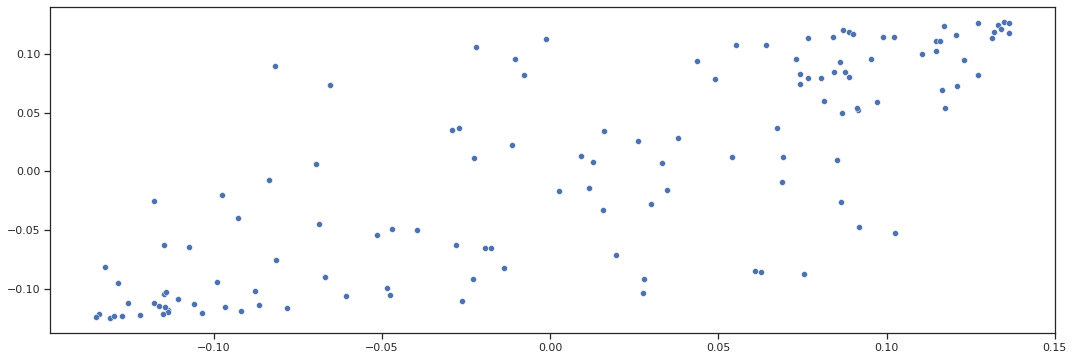

In [40]:
sns.scatterplot(test_results.signature[0,], np.array(sign4_df.iloc[:,0:128][sign4_df['SMILES_cc']=="OCC(NC(=O)C(Cl)Cl)C(O)c1ccc(cc1)[N+]([O-])=O"])[0])

In [42]:
np.corrcoef(test_results.signature[0,], np.array(sign4_df.iloc[:,0:128][sign4_df['SMILES_cc']=="OCC(NC(=O)C(Cl)Cl)C(O)c1ccc(cc1)[N+]([O-])=O"])[0])

array([[1.       , 0.7982486],
       [0.7982486, 1.       ]])

/opt/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

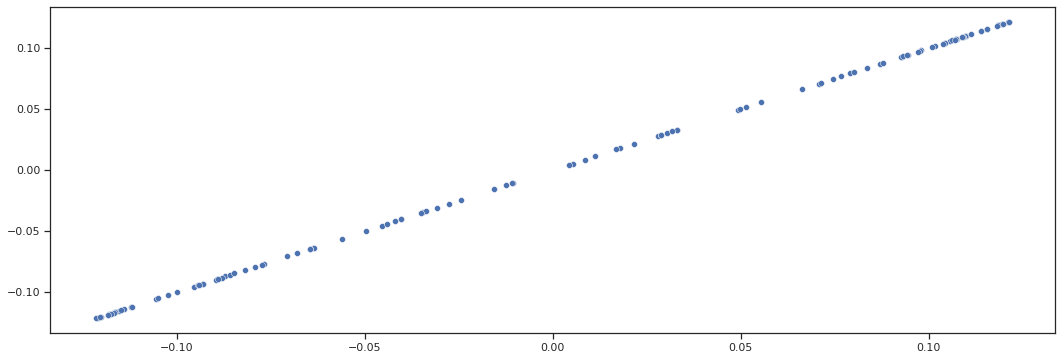

In [43]:
sns.scatterplot(test_results.signature[1,], np.array(sign4_df.iloc[:,0:128][sign4_df['SMILES_cc']=="CC(C(O)=O)c1ccc2c([nH]c3ccc(Cl)cc23)c1"])[0])

/opt/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

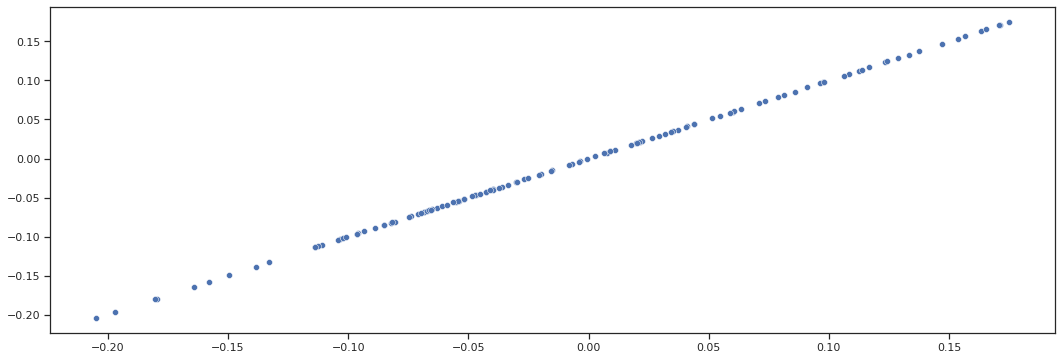

In [44]:
sns.scatterplot(test_results.signature[2,], np.array(sign4_df.iloc[:,0:128][sign4_df['SMILES_cc']=="Cc1cccc(C)c1NC2=NCCCS2"])[0])